# DATA CHALLENGE : HOUSE  PRICE FORCASTING

In [1]:
#!python -m pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy as sp
#from metrics.custom_metric_ilb import custom_metric_function
from pycaret.regression import compare_models, setup

In [3]:
pd.options.display.max_rows=28
pd.options.display.max_columns=28

## 1. DATA PREPROCESSING :

In [4]:
filepath='data/'
X_train_raw=pd.read_csv(filepath +'X_train_J01Z4CN.csv') 
Y_train_raw=pd.read_csv(filepath + 'y_train_OXxrJt1.csv')
Y_test_raw=pd.read_csv(filepath + 'y_random_MhJDhKK.csv')
X_test_raw=pd.read_csv(filepath + 'X_test_BEhvxAN.csv')


In [5]:
X_train_raw=X_train_raw.drop(columns="id_annonce")
X_train_raw.head()


,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,52.0,E,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,NaN,NaN,Sud,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,44.0,E,NaN,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Y_train_raw=Y_train_raw.drop(columns="id_annonce")
Y_train_raw.head()

,price
0,355000.0
1,190000.0
2,39000.0
3,299000.0
4,478000.0


In [7]:
X_train_raw.describe()

,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
count,37368.000000,37368.000000,37368.000000,36856.000000,9743.000000,1.558100e+04,19068.000000,18530.000000,35802.000000,34635.000000,24095.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000
mean,46.546155,2.619087,53598.371655,1088.831615,3.479524,3.995665e+03,205.385148,31.845548,4.245405,2.864877,0.920730,0.293486,0.179699,7.979153,0.148282,0.309596,0.200145,0.053870,0.039847,0.003827,0.000241
std,2.356581,2.597060,28807.220527,5555.320867,6.725577,5.441595e+04,790.501769,310.576209,2.987782,2.156517,0.270778,0.455365,0.383942,4.646145,0.355384,0.462333,0.400114,0.225763,0.195602,0.061744,0.015518
min,41.374436,-4.733545,1000.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.921547,1.096014,30150.000000,74.000000,1.000000,3.620000e+02,125.000000,8.000000,3.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.939440,2.380793,59000.000000,115.000000,2.000000,7.950000e+02,180.000000,16.000000,4.000000,3.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.841511,4.624248,78210.000000,235.250000,4.000000,1.841000e+03,239.000000,36.000000,5.000000,4.000000,1.000000,1.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.075892,9.503198,95880.000000,411311.000000,55.000000,6.203700e+06,100000.000000,17024.000000,130.000000,118.000000,3.000000,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# L=["property_type","city","energy_performance_category","ghg_category","exposition"]
# for x in L:
#     X_train[x]=X_train[x].astype("category")
#     X_test[x]=X_test[x].astype("category")


In [9]:
X_train_raw.isna().sum()/len(X_train_raw.index)*100


property_type                   0.000000
approximate_latitude            0.000000
approximate_longitude           0.000000
city                            0.000000
postal_code                     0.000000
size                            1.370156
floor                          73.926889
land_size                      58.303896
energy_performance_value       48.972383
energy_performance_category    48.972383
ghg_value                      50.412117
ghg_category                   50.412117
exposition                     75.663669
nb_rooms                        4.190751
nb_bedrooms                     7.313744
nb_bathrooms                   35.519696
nb_parking_places               0.000000
nb_boxes                        0.000000
nb_photos                       0.000000
has_a_balcony                   0.000000
nb_terraces                     0.000000
has_a_cellar                    0.000000
has_a_garage                    0.000000
has_air_conditioning            0.000000
last_floor      

<AxesSubplot:>

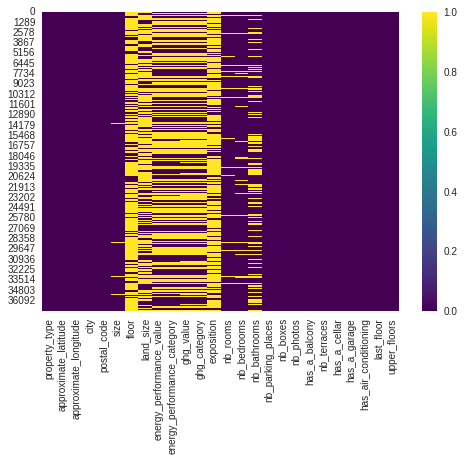

In [10]:
sb.heatmap(X_train_raw.isnull(),cmap='viridis')

## 1. Cleaning the data
### a. DataTypes :
First let's make sure that all the data has the proper type (especially that categorical data isn't set as numerical)

In [11]:
# Numerical type Columns
X_train_raw.select_dtypes(np.number)


,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,43.643880,7.117183,6270,63.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,45.695757,4.895610,69200,90.0,3.0,NaN,223.0,52.0,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.966791,-1.220451,35130,61.0,NaN,370.0,NaN,NaN,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.289292,-1.878805,44360,142.0,NaN,764.0,217.0,44.0,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,45.718992,4.844234,69007,88.0,3.0,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,43.480292,-1.484324,64100,2995.0,NaN,NaN,255.0,59.0,1.0,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,48.861391,2.401158,75020,36.0,4.0,NaN,229.0,53.0,2.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,44.397837,-1.164312,40600,99.0,2.0,NaN,NaN,NaN,4.0,3.0,NaN,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,48.864204,2.808693,77700,9281.0,NaN,NaN,NaN,NaN,5.0,4.0,NaN,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_train_raw.select_dtypes(np.number).columns

Index(['approximate_latitude', 'approximate_longitude', 'postal_code', 'size',
       'floor', 'land_size', 'energy_performance_value', 'ghg_value',
       'nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places',
       'nb_boxes', 'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors'],
      dtype='object')

In [13]:
X_train_raw.select_dtypes(object)

,property_type,city,energy_performance_category,ghg_category,exposition
0,appartement,villeneuve-loubet,NaN,NaN,NaN
1,appartement,venissieux,D,E,NaN
2,maison,moutiers,NaN,NaN,Sud
3,maison,cordemais,D,E,NaN
4,appartement,lyon-7eme,NaN,NaN,NaN
...,...,...,...,...,...
37363,appartement,bayonne,E,F,NaN
37364,appartement,paris-20eme,D,E,Sud
37365,appartement,biscarrosse,NaN,NaN,NaN
37366,duplex,magny-le-hongre,NaN,NaN,NaN


In [14]:
X_train_raw.select_dtypes(object).columns

Index(['property_type', 'city', 'energy_performance_category', 'ghg_category',
       'exposition'],
      dtype='object')

### b. Dealing with NaN Values :

Missing values :

```
size                             512 # Numerical
floor                          27625 # Numerical
land_size                      21787 # Numerical
energy_performance_value       18300 # Numerical
energy_performance_category    18300 # Categorical
ghg_value                      18838 # Numerical
ghg_category                   18838 # Categorical
exposition                     28274 # Categorical
nb_rooms                        1566 # Numerical
nb_bedrooms                     2733 # Numerical
nb_bathrooms                   13273 # Numerical
```

- For houses we'll set the the floor value at 0
- For appartements we'll set the landsize value at 0

Based on the missing values heatmap we'll drop : 
- Energy__performance_category (Derived Data from Energy_performance value)
- GHG_category (Derived Data from ghg_value)
- Exposition (75.66% missing Data)


In [15]:
# Dropping the columns
X_train_1=X_train_raw.drop(columns=["exposition","city", "energy_performance_category", "ghg_category"])

In [16]:
from sklearn.neighbors import KNeighborsRegressor

#KNN imputation / Try and expirement different imputations
def knn_impute(df0, column):
    """ 
    """
    # Creating a copy of the input dataframe
    df = df0.copy()

    # numeric_df : subset of df composed only of numerical data type colums
    numeric_df = df.select_dtypes(np.number)

    # full columns : columns that have no missing data
    full_columns=numeric_df.loc[:,numeric_df.isna().sum()==0].columns

    # knn_x_train : training data for the missing values
    knn_x_train = numeric_df.loc[numeric_df[column].isna()==False, full_columns]

    # knn_y_train: target data for the missing valies 
    knn_y_train= numeric_df.loc[numeric_df[column].isna()==False, column]

    # knn_x_test : the data with missing values for the target column
    knn_x_test = numeric_df.loc[numeric_df[column].isna()==True, full_columns]

    # Creating the KNeighbors Regress
    knn=KNeighborsRegressor()

    # Fitting the model
    knn.fit(knn_x_train, knn_y_train)

    y_pred=knn.predict(knn_x_test)

    df.loc[df[column].isna()==True, column]=y_pred


    return df

In [17]:
def knn_impute_all(df, list_columns):
    """
    """
    for column in list_columns:
        df=knn_impute(df,column)
    return df

In [18]:
list_columns = ["size", "land_size","energy_performance_value","ghg_value", "nb_rooms","nb_bathrooms", "nb_bedrooms"]
X_train_2 = knn_impute_all(X_train_1, list_columns=list_columns)
X_train_2.isna().sum()

property_type                   0
approximate_latitude            0
approximate_longitude           0
postal_code                     0
size                            0
floor                       27625
land_size                       0
energy_performance_value        0
ghg_value                       0
nb_rooms                        0
nb_bedrooms                     0
nb_bathrooms                    0
nb_parking_places               0
nb_boxes                        0
nb_photos                       0
has_a_balcony                   0
nb_terraces                     0
has_a_cellar                    0
has_a_garage                    0
has_air_conditioning            0
last_floor                      0
upper_floors                    0
dtype: int64

In [19]:
X_train_2.loc[(X_train_2['property_type']!="appartement"), 'floor'] = 0


In [20]:
X_train_2.isna().sum()

property_type                  0
approximate_latitude           0
approximate_longitude          0
postal_code                    0
size                           0
floor                       6135
land_size                      0
energy_performance_value       0
ghg_value                      0
nb_rooms                       0
nb_bedrooms                    0
nb_bathrooms                   0
nb_parking_places              0
nb_boxes                       0
nb_photos                      0
has_a_balcony                  0
nb_terraces                    0
has_a_cellar                   0
has_a_garage                   0
has_air_conditioning           0
last_floor                     0
upper_floors                   0
dtype: int64

In [21]:
X_train_3=knn_impute(X_train_2, "floor")

In [22]:
X_train_3.isna().sum()

property_type               0
approximate_latitude        0
approximate_longitude       0
postal_code                 0
size                        0
floor                       0
land_size                   0
energy_performance_value    0
ghg_value                   0
nb_rooms                    0
nb_bedrooms                 0
nb_bathrooms                0
nb_parking_places           0
nb_boxes                    0
nb_photos                   0
has_a_balcony               0
nb_terraces                 0
has_a_cellar                0
has_a_garage                0
has_air_conditioning        0
last_floor                  0
upper_floors                0
dtype: int64

## 2. Feature Engineering 


## 3. Feature Transformations 


In [23]:
from scipy.stats import skew

In [24]:
for column in X_train_3.select_dtypes(np.number).columns :
    print(f"{column} : {skew(X_train_3[column])}")

approximate_latitude : -0.17533684420575574
approximate_longitude : -0.06051568873374531
postal_code : -0.17863062254724646
size : 36.98874931913297
floor : 10.656816925713077
land_size : 143.20425388311963
energy_performance_value : 118.13135409638123
ghg_value : 47.149314662836886
nb_rooms : 8.02566113218685
nb_bedrooms : 9.164623048589663
nb_bathrooms : -3.5180498242711935
nb_parking_places : 0.9070357101110718
nb_boxes : 1.6685082621271183
nb_photos : 1.0190572555306658
has_a_balcony : 1.9793954900691857
nb_terraces : 0.82367437168989
has_a_cellar : 1.498871484580463
has_a_garage : 3.952249370306829
has_air_conditioning : 4.7050545382992075
last_floor : 16.072290652519023
upper_floors : 64.41273353076863


## 4. Encoding
Issue 1 : Hot encoding city column : explostion in dimensionality (for now I dropped it )
possible solution : Frequency encoding / Target encoding

In [25]:
X_train_4 = pd.get_dummies(X_train_3)

In [26]:
X_train_4.head()

,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,...,property_type_gîte,property_type_hôtel,property_type_hôtel particulier,property_type_loft,property_type_maison,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa
0,43.643880,7.117183,6270,63.0,0.6,244.6,145.4,28.0,3.0,2.0,1.0,0.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45.695757,4.895610,69200,90.0,3.0,424.8,223.0,52.0,5.0,4.0,0.8,0.0,0.0,8.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47.966791,-1.220451,35130,61.0,0.0,370.0,138.6,25.2,2.0,1.0,1.0,0.0,0.0,4.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47.289292,-1.878805,44360,142.0,0.0,764.0,217.0,44.0,4.0,3.0,1.0,0.0,1.0,8.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,45.718992,4.844234,69007,88.0,3.0,81.6,78.6,10.0,4.0,3.0,1.0,0.0,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 5. Scaling


In [27]:
scaler = StandardScaler()
scaler.fit(X_train_4)
X_train_5=pd.DataFrame(scaler.transform(X_train_4), index=X_train_4.index, columns=X_train_4.columns)

In [28]:
X_train_5.head()

,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,...,property_type_gîte,property_type_hôtel,property_type_hôtel particulier,property_type_loft,property_type_maison,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa
0,-1.231578,1.732018,-1.642956,-0.185264,-0.167590,-0.073765,-0.098289,-0.021911,-0.421947,-0.390654,0.282606,-0.644516,-0.468044,-0.856453,...,-0.00896,-0.005173,-0.012672,-0.038042,-0.850049,-0.020039,-0.021334,-0.050751,-0.105066,-0.014633,-0.206902,-0.08966,-0.068987,-0.146104
1,-0.360866,0.876589,0.541595,-0.180392,0.448357,-0.068713,0.026680,0.073577,0.251787,0.547277,-0.573113,-0.644516,-0.468044,0.004487,...,-0.00896,-0.005173,-0.012672,-0.038042,-0.850049,-0.020039,-0.021334,-0.050751,-0.105066,-0.014633,-0.206902,-0.08966,-0.068987,-0.146104
2,0.602846,-1.478437,-0.641111,-0.185625,-0.321576,-0.070249,-0.109240,-0.033051,-0.758815,-0.859620,0.282606,-0.644516,-0.468044,-0.856453,...,-0.00896,-0.005173,-0.012672,-0.038042,1.176403,-0.020039,-0.021334,-0.050751,-0.105066,-0.014633,-0.206902,-0.08966,-0.068987,-0.146104
3,0.315350,-1.731940,-0.320701,-0.171009,-0.321576,-0.059204,0.017017,0.041748,-0.085080,0.078312,0.282606,-0.644516,2.136552,0.004487,...,-0.00896,-0.005173,-0.012672,-0.038042,1.176403,-0.020039,-0.021334,-0.050751,-0.105066,-0.014633,-0.206902,-0.08966,-0.068987,-0.146104
4,-0.351006,0.856806,0.534895,-0.180753,0.448357,-0.078334,-0.205866,-0.093527,-0.085080,0.078312,0.282606,-0.644516,2.136552,-0.641218,...,-0.00896,-0.005173,-0.012672,-0.038042,-0.850049,-0.020039,-0.021334,-0.050751,-0.105066,-0.014633,-0.206902,-0.08966,-0.068987,-0.146104


## 6. Target Transformation


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

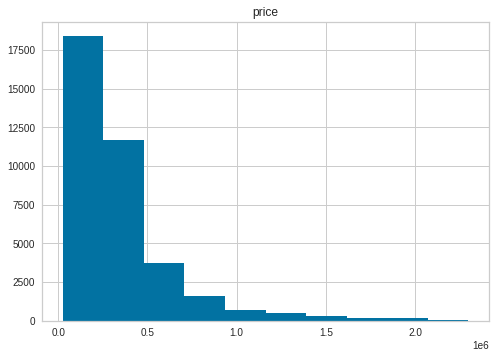

In [29]:
Y_train_raw.hist()

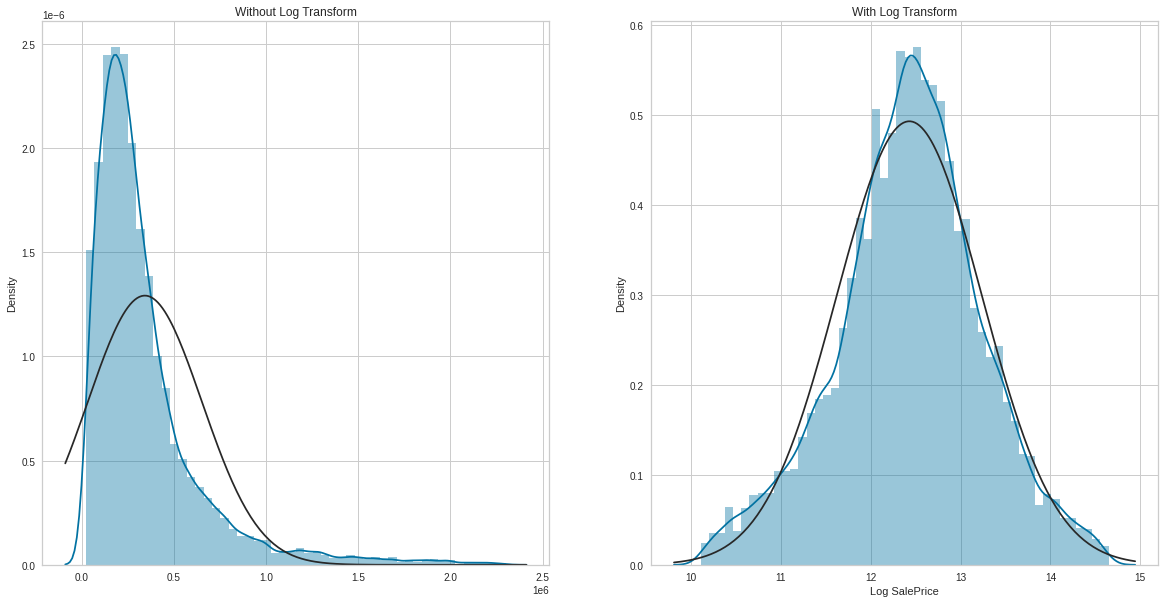

In [30]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sb.distplot(Y_train_raw, kde=True, fit=sp.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sb.distplot(np.log(Y_train_raw), kde=True, fit=sp.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()


In [31]:
Y_train=np.log(Y_train_raw)

## 7. Model Selection


In [32]:
data6=pd.concat([X_train_5, Y_train], axis=1)
data6.to_pickle("data.pkl") 

In [33]:
# data6.head()

In [34]:
#from metrics.custom_metric_ilb import custom_metric_function
from pycaret.regression import compare_models, setup
import pycaret


In [37]:
setup(feature_interaction=False,polynomial_features=False,use_gpu = True, silent = True, data = data6, target="price")

,Description,Value
0,session_id,4010
1,Target,price
2,Original Data,"(37368, 44)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,31
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(26157, 43)"


(-1,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='price')),
                 ('fix_perfect', Remove_100(target='pr

In [38]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.2964,0.1674,0.4091,0.7439,0.0311,0.0242,0.5030
lightgbm,Light Gradient Boosting Machine,0.3090,0.1765,0.4200,0.7300,0.0319,0.0252,0.3020
rf,Random Forest Regressor,0.2975,0.1784,0.4222,0.7273,0.0321,0.0243,5.4810
et,Extra Trees Regressor,0.3062,0.1906,0.4365,0.7085,0.0330,0.0250,4.4870
gbr,Gradient Boosting Regressor,0.3699,0.2428,0.4927,0.6287,0.0372,0.0301,5.0400
knn,K Neighbors Regressor,0.4283,0.3227,0.5680,0.5065,0.0426,0.0348,1.3620
dt,Decision Tree Regressor,0.4266,0.3801,0.6165,0.4185,0.0467,0.0348,0.3130
ada,AdaBoost Regressor,0.4858,0.3844,0.6200,0.4121,0.0466,0.0393,2.1180
lr,Linear Regression,0.5243,0.4617,0.6794,0.2936,0.0513,0.0425,0.0390
ridge,Ridge Regression,0.5244,0.4617,0.6794,0.2935,0.0513,0.0425,0.0520


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', ...)

## 8. Hyperparameter Optimization


## 9. Ensembling

## 9. Feauture selection
